In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
imdb = keras.datasets.imdb

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [4]:
print(f"Training entries: {len(train_data)}, labels: {len(train_labels)}")
print(f"Testing entries: {len(test_data)}, labels: {len(train_labels)}")

Training entries: 25000, labels: 25000
Testing entries: 25000, labels: 25000


In [5]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [6]:
print(train_labels[0])

1


In [7]:
len(train_data[0]), len(train_data[1])
# movie revies are different length
# inputs to a neural network must be of same length

(218, 189)

In [8]:
# A dictionary mapping words to and integer index
word_index = imdb.get_word_index()

# the first 4 indices are reserved
word_index = {k:(v+3) for k, v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2 # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [9]:
index = 2

print(decode_review(train_data[index]))
print(train_labels[index])

index = 8

print(decode_review(train_data[index]))
print(train_labels[index])

<START> this has to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was aimed at we just sat watched the first half an hour with our jaws touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally crying into their popcorn that they actually paid money they had <UNK> working to watch this feeble excuse for a film it must have looked like a great idea on paper but on film it looks like no one in the film has a clue what is going on crap acting crap costumes i can't get across how <UNK> this is to watch save yourself an hour a bit of your life
0
<START> just got out and cannot believe what a brilliant documentary this is rarely do you walk out of a movie theater in such awe and <UNK> lately movies have become so over hyped that the thrill of discovering something truly special and unique rarely happens <UNK> <UNK> did this to me when it 

In [10]:
train_data = keras.preprocessing.sequence.pad_sequences(
    train_data,
    value=word_index["<PAD>"],
    padding='post',
    maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(
    test_data,
    value=word_index["<PAD>"],
    padding='post',
    maxlen=256)

print(len(train_data[0]))
print(len(train_data[1]))
print(train_data[0])
print(train_data[1])

256
256
[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  10

In [11]:
# input shape is the vocabulary count used for the movie reviews (10 000 words)
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [12]:
# tf.keras.optimizers.Adam(lr=1e-3, decay=1e-5)
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['acc'])

In [13]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [14]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 40,
                    batch_size = 512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 1s 61us/sample - loss: 0.6924 - acc: 0.5193 - val_loss: 0.6910 - val_acc: 0.5764
Epoch 2/40
15000/15000 [==============================] - 0s 24us/sample - loss: 0.6880 - acc: 0.5779 - val_loss: 0.6846 - val_acc: 0.7216
Epoch 3/40
15000/15000 [==============================] - 0s 24us/sample - loss: 0.6779 - acc: 0.7153 - val_loss: 0.6719 - val_acc: 0.7207
Epoch 4/40
15000/15000 [==============================] - 0s 25us/sample - loss: 0.6595 - acc: 0.7507 - val_loss: 0.6503 - val_acc: 0.7554
Epoch 5/40
15000/15000 [==============================] - 0s 24us/sample - loss: 0.6303 - acc: 0.7786 - val_loss: 0.6186 - val_acc: 0.7729
Epoch 6/40
15000/15000 [==============================] - 0s 27us/sample - loss: 0.5906 - acc: 0.7973 - val_loss: 0.5786 - val_acc: 0.7957
Epoch 7/40
15000/15000 [==============================] - 0s 27us/sample - loss: 0.5438 - acc: 0.8245 - val_loss: 0.

In [15]:
results = model.evaluate(test_data, test_labels)

print(results)

25000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.33047525095939634, 0.87184]


In [16]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

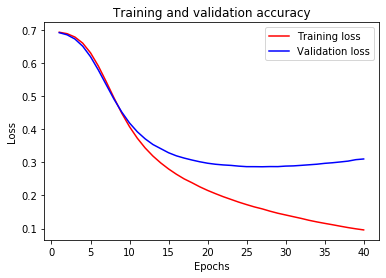

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history_dict['acc']
loss = history_dict['loss']
val_acc = history_dict['val_acc']
val_loss = history_dict['val_loss']


epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

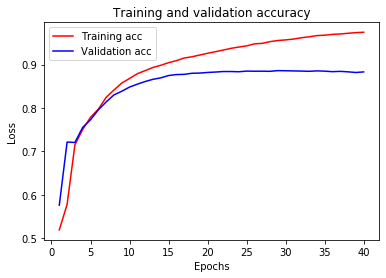

In [18]:
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [19]:
# the item to predict
index = 2

print(f"Sample Dataset. Row#{index}")
print("========================")
print(x_val[index])
print(decode_review(x_val[index]))
print(f"Review: {y_val[index]}")
print()

print("Prediction")
print("==========")
print(model.predict_classes([[x_val[index]]]))
print(model.predict_proba([[x_val[index]]]))

Sample Dataset. Row#2
[   1   14   47    8   30   31    7    4  249  108    7    4 5974   54
   61  369   13   71  149   14   22  112    4 2401  311   12   16 3711
   33   75   43 1829  296    4   86  320   35  534   19  263 4821 1301
    4 1873   33   89   78   12   66   16    4  360    7    4   58  316
  334   11    4 1716   43  645  662    8  257   85 1200   42 1228 2578
   83   68 3912   15   36  165 1539  278   36   69    2  780    8  106
   14 6905 1338   18    6   22   12  215   28  610   40    6   87  326
   23 2300   21   23   22   12  272   40   57   31   11    4   22   47
    6 2307   51    9  170   23  595  116  595 1352   13  191   79  638
   89    2   14    9    8  106  607  624   35  534    6  227    7  129
  113    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0

In [20]:
def encode_text(text):
    # Extract each word from the string
    words = []
    for word in text.split():
        words.append(word)
    
    # Convert each word into each numeric representation
    encoded_text = []
    for word in words:
        num = word_index.get(word)    
        # Only append if the word is less than 10000 and not None, else add 2 (<UNK>)
        encoded_text.append(num if (num != None and num < 10000) else \
                            word_index["<UNK>"])
        
    return encoded_text

#==================================
# positives
# review  = 

# negatives
# 

review = "This is an awfully good movie!!"

#==================================

encoded_review = encode_text("<START> " + review)
#print(encoded_review)

# perform padding
test = keras.preprocessing.sequence.pad_sequences(
    [encoded_review],
    value=word_index["<PAD>"],
    padding='post',
    maxlen=256)
# print(test)

print("Prediction")
print("==========")
print(model.predict_classes([test]))
print(model.predict_proba([test]))

Prediction
[[1]]
[[0.50614345]]
